## Set up

In [2]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats
import itertools

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
t1=time.time()
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data=pd.read_csv(file)
t2=time.time()
print('time',t2-t1)
data.head()

time 10.685540914535522


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [0]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

## Model preparation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.2, 
                                    random_state=2018, stratify=dataY)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(227845, 30)
(56962, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212834,139011.0,-0.379130,-0.225481,-0.067639,-2.083944,0.413273,-0.595574,0.080431,-1.079226,-0.877062,0.846388,0.578747,-1.291389,-1.826879,0.256720,-0.619096,1.136612,-0.235776,-0.384647,0.503161,-0.332456,1.308242,1.385184,-0.139885,0.776546,-0.808888,-0.187489,0.007297,0.006518,40.85
175643,122427.0,2.244087,-0.767829,-2.070101,-1.254809,0.421882,0.089034,-0.338297,-0.183900,-0.791241,0.959436,0.100388,0.322699,1.301804,-0.164806,-1.000000,0.909190,-0.275122,-0.683951,1.191161,0.112462,0.554949,1.710332,-0.295550,-0.276130,0.640818,0.304774,-0.045794,-0.085053,25.00
32164,36667.0,-0.259929,1.178253,0.959979,0.893219,0.138211,0.308575,0.162053,-1.693802,-0.458626,0.466337,1.698837,1.082110,0.335653,0.268162,0.435957,-0.360334,-0.230094,-0.000775,0.064709,-0.343920,1.692553,0.241576,0.363848,0.201667,-1.191330,-0.577199,0.159677,-0.040558,20.00
79783,58175.0,1.326714,-0.979670,0.203249,-1.160625,-0.516291,1.057040,-1.223916,0.353060,-0.462884,0.731991,-0.039891,-0.727925,-0.041904,-0.206110,0.859287,1.918979,-0.511402,-0.165763,0.795608,0.177711,0.366708,0.896861,-0.329819,-1.667834,0.520263,0.067019,0.036122,0.001110,54.95
107026,70244.0,-0.316006,1.159747,1.154488,-0.026924,0.249228,-0.765126,0.741892,-0.080559,-0.450903,-0.526952,-0.442288,0.084065,0.710779,-0.556283,0.861955,0.462450,-0.152406,-0.086386,0.040609,0.160123,-0.281086,-0.711952,-0.064787,-0.011570,-0.094594,0.092373,0.248520,0.095811,3.59


In [9]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.001729245759178389
0.0017204452090867595


In [10]:
# Feature scaling
#featuresToScale = X_train.drop(['Time'],axis=1).columns
featuresToScale = X_train.columns
sc =StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sc.fit_transform(X_train[featuresToScale])
X_test.loc[:,featuresToScale] = sc.fit_transform(X_test[featuresToScale])
scalingFactors = pd.DataFrame(data=[sc.mean_,sc.scale_],index=['Mean','StDev'],columns=featuresToScale)
scalingFactors

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,94681.925073,0.000399,-0.004080,0.009107,0.000734,-0.009643,-0.010895,-0.001316,0.009870,0.001747,-0.003108,-0.004560,0.002535,-0.004674,-0.002502,-0.001806,-0.001967,-0.002832,-0.006006,0.001616,-0.003509,-0.002162,0.001102,-0.004377,0.001487,-0.001124,0.002888,-0.000592,0.000148,88.185405
StDev,47459.338182,1.940773,1.613776,1.520371,1.412150,1.375041,1.314685,1.220063,1.128458,1.096100,1.087621,1.024336,1.012116,0.994172,0.960109,0.915068,0.881278,0.862427,0.839398,0.812576,0.756921,0.684233,0.719400,0.606473,0.603185,0.517416,0.484152,0.394969,0.291890,244.413805


In [11]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212834,0.929866,-0.193073,-0.136401,-0.043138,-1.470758,0.297396,-0.447622,0.064531,-0.889699,-0.797467,0.776393,0.566393,-1.296013,-1.836230,0.267262,-0.676824,1.298439,-0.279522,-0.460873,0.618323,-0.430451,1.751624,1.905023,-0.224179,1.281495,-1.549426,-0.387693,0.017619,0.019338,-0.189009
175643,0.580694,1.143158,-0.463007,-1.364709,-0.885539,0.303628,0.064574,-0.272796,-0.149913,-0.719396,0.880187,0.097321,0.324650,1.306457,-0.172646,-1.092941,1.038524,-0.326029,-0.818098,1.463113,0.144095,0.742613,2.352105,-0.471710,-0.454853,1.226524,0.634151,-0.113222,-0.250816,-0.252024
32164,-1.224963,-0.132353,0.708940,0.635064,0.630581,0.098297,0.228825,0.130285,-1.397507,-0.416816,0.427452,1.664735,1.087154,0.335982,0.279203,0.475767,-0.412378,-0.272806,-0.002717,0.079952,-0.445254,2.266397,0.332549,0.576834,0.333255,-2.281741,-1.196653,0.393154,-0.119545,-0.271903
79783,-0.772117,0.675861,-0.590580,0.135642,-0.819062,-0.375454,0.788796,-0.986251,0.293763,-0.420689,0.671360,-0.040234,-0.730253,-0.043266,-0.215751,0.938233,2.192584,-0.605309,-0.199633,0.977417,0.228355,0.490470,1.233574,-0.526203,-2.750412,0.995680,0.140617,0.088656,0.003383,-0.132951
107026,-0.518007,-0.160919,0.697795,0.763434,-0.018874,0.178655,-0.574474,0.597402,-0.064525,-0.409790,-0.484532,-0.434819,0.085043,0.712786,-0.581195,0.941147,0.527959,-0.180979,-0.104895,0.050360,0.205643,-0.377229,-0.978564,-0.104761,-0.018472,-0.181671,0.193247,0.612103,0.282770,-0.337145


In [0]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

## Base method (not use any sampling)

### Null accuracy

In [0]:
y_test.value_counts(normalize=True)

0    0.998276
1    0.001724
Name: Class, dtype: float64

### SGD classifier

In [0]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred=sgd_clf.predict(X_test)
#y_pred_probs=sgd_clf.predict_proba(X_test)

#precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
#average_precision = average_precision_score(y_test,y_pred_probs[:,1])

#fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
#areaUnderROC = auc(fpr, tpr)

confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

accuracy_score: 
 0.9982763573685722
confusion_matrix 
 [[93825     0]
 [  162     0]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.00      0.00      0.00       162

    accuracy                           1.00     93987
   macro avg       0.50      0.50      0.50     93987
weighted avg       1.00      1.00      1.00     93987



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Logistic Regression

In [0]:
penalty = 'l2'
C = 0.1
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [0]:
logReg.fit(X_train, y_train)

y_pred=logReg.predict(X_test)
y_pred_probs=logReg.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)

In [0]:
print(X_train.shape)
print(thresholds.shape)
print(precision.shape)

(190820, 30)
(357,)
(48171,)


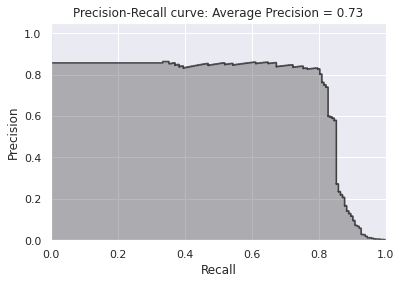

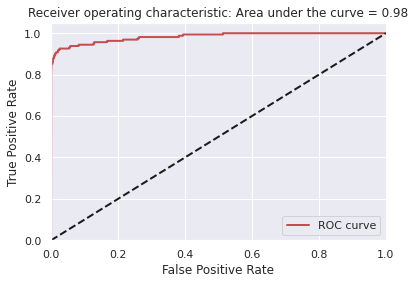

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

accuracy_score: 
 0.9771426565078474
confusion_matrix 
 [[55571  1293]
 [    9    89]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



#### Decision Function

In [0]:
from sklearn.model_selection import cross_val_predict
logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

y_scores = cross_val_predict(logReg, X_train, y_train, cv=5,
                             method="decision_function")

In [0]:
pd.DataFrame(y_scores).describe()

,0
count,190820.000000
mean,-3.689758
std,3.145998
min,-67.930235
25%,-4.550546
50%,-3.465623
75%,-2.466984
max,112.879125


In [0]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

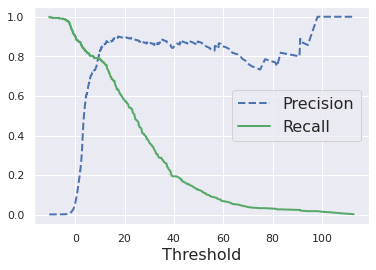

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    #plt.axis([-50000, 50000, 0, 1])             # Not shown

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [0]:
require=0.99
threshold_recall = thresholds[np.argmax(recalls >= require)]
threshold_recall

-10.545020102791733

In [0]:
require=0.8
threshold_precision = thresholds[np.argmax(precisions >= require)]
threshold_precision

9.475798962027245

In [0]:
y_train_pred = (y_scores >= threshold_precision)
y_train_pred

array([False, False, False, ..., False, False, False])

In [0]:
precision_score(y_train, y_train_pred)

0.8006134969325154

In [0]:
recall_score(y_train, y_train_pred)

0.7909090909090909

In [0]:
require=0.4
threshold_precision = thresholds[np.argmax(precisions >= require)]
y_train_pred = (y_scores >= threshold_precision)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.40      0.85      0.54       330

    accuracy                           1.00    190820
   macro avg       0.70      0.92      0.77    190820
weighted avg       1.00      1.00      1.00    190820



#### Optimal Threshold for ROC Curve

In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(357,)
Best Threshold=0.475119, G-Mean=0.950


In [0]:
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_threshold_1 = thresholds[ix]
print('Best Threshold=%f' % (best_threshold_1))

Best Threshold=0.475119


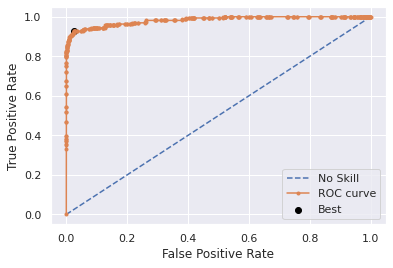

In [0]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [0]:
best_threshold_1=0.99
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in y_pred_probs[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9989147435283603
confusion_matrix 
 [[93751    74]
 [   28   134]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.64      0.83      0.72       162

    accuracy                           1.00     93987
   macro avg       0.82      0.91      0.86     93987
weighted avg       1.00      1.00      1.00     93987



#### Optimal Threshold for Precision-Recall Curve

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.999978, F-Score=0.819


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.73')

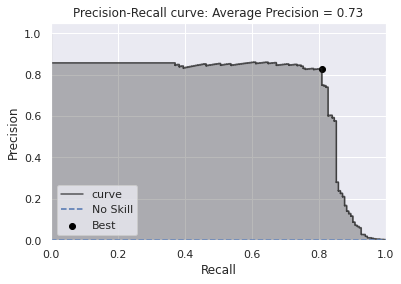

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9993828933788715
confusion_matrix 
 [[93798    27]
 [   31   131]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.83      0.81      0.82       162

    accuracy                           1.00     93987
   macro avg       0.91      0.90      0.91     93987
weighted avg       1.00      1.00      1.00     93987



### Random forest

In [0]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [0]:
RFC.fit(X_train, y_train)

y_pred=RFC.predict(X_test)
y_pred_probs=RFC.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)

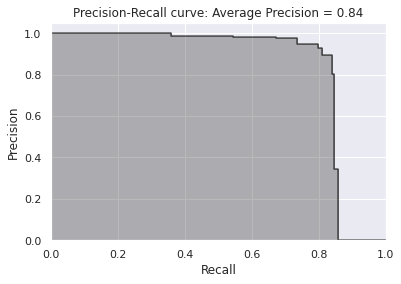

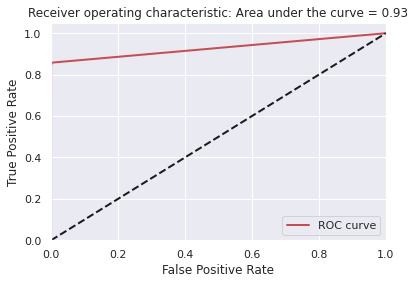

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

accuracy_score: 
 0.9995318501494888
confusion_matrix 
 [[93818     7]
 [   37   125]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.95      0.77      0.85       162

    accuracy                           1.00     93987
   macro avg       0.97      0.89      0.93     93987
weighted avg       1.00      1.00      1.00     93987



### XGB

In [0]:
params_xGB = {
    'nthread':16, #number of cores OK
#    'learning rate': 0.3, #range 0 to 1, default 0.3
#   'gamma': 0, #range 0 to infinity, default 0 OK
        # increase to reduce complexity (increase bias, reduce variance)
#    'max_depth': 6, #range 1 to infinity, default 6 OK
#    'min_child_weight': 1, #range 0 to infinity, default 1
#    'max_delta_step': 0, #range 0 to infinity, default 0 OK
#    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
#    'colsample_bytree': 1.0, #range 0 to 1, default 1 OK
        # subsample ratio of features
    'objective':'binary:logistic', #OK
    'num_class':1, #OK
    'eval_metric':'logloss', #OK
    'seed':2018, #
    'silent':1 #(verposity: 1) OK
}
xgb=XGBClassifier(
                  #learning_rate =0.007,
                  #n_estimators=1000,
                  #max_depth = 3,
                  #min_child_weight = 5,
                  #gamma=0.4,
                  #subsample=0.55,
                  #colsample_bytree=0.85,
                  #reg_alpha=0.005,
                  nthread=16,
                  objective='binary:logistic',
                  eval_metric = 'logloss',
                  #scale_pos_weight=1 # keep default 1
                  seed=2018,
                  verbosity=1    
                                )

In [0]:
np.sum(y_train == 0)/ float(np.sum(y_train == 1))

577.2424242424242

In [0]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [0]:
xgb=XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                scale_pos_weight=1,
                seed=2018,
                verbosity=1    
                              )
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
y_pred_probs=xgb.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print('classification_report \n',classification_report(y_test, y_pred))

average_precision 0.8579233102391428
AUC 0.9804375710610636
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



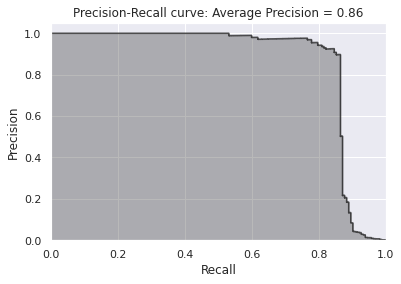

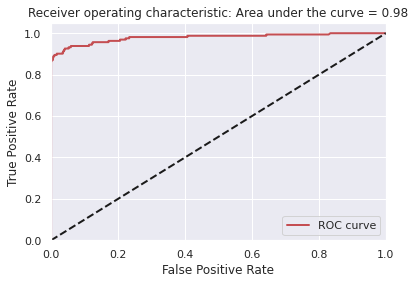

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

#### Threshold by ROC

In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(14906,)
Best Threshold=0.003698, G-Mean=0.942


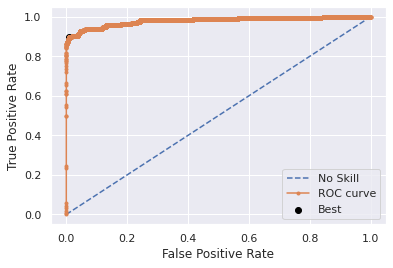

In [0]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [0]:
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in y_pred_probs[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9913498675348719
confusion_matrix 
 [[93029   796]
 [   17   145]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     93825
           1       0.15      0.90      0.26       162

    accuracy                           0.99     93987
   macro avg       0.58      0.94      0.63     93987
weighted avg       1.00      0.99      0.99     93987



#### Threshold by precision - recall curve

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.504912, F-Score=0.880


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.86')

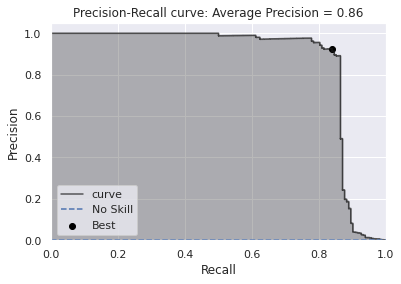

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9996063285347974
confusion_matrix 
 [[93814    11]
 [   26   136]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.93      0.84      0.88       162

    accuracy                           1.00     93987
   macro avg       0.96      0.92      0.94     93987
weighted avg       1.00      1.00      1.00     93987



### LightGB

Grid search CV lightgbm

In [0]:
gridParams = {
    'n_estimators': [100,200,500], #200
    'boosting_type' : ['gbdt'], # 
    'objective' : ['binary'], #
    'metric': ['logloss'],
    'metric_freq':[50],
    'learning_rate': [0.01], #default: 0.1
    'max_depth':[2,4], #default: -1
    'num_leaves': [16], #default: 31
    'scale_pos_weight':[1], #default: 1
    'num_threads':[16],
    'random_state' : [500],
    'bagging_freq': [0],
    'reg_alpha' : [1,2],
    'reg_lambda' : [1,2],
    #'max_bin':[255, 510], # 
    #'feature_fraction' : [0.8], #feature extraction
    #'bagging_fraction' : [0.8],
    #'verbose': [1]
    }
gridParams

{'bagging_freq': [0],
 'boosting_type': ['gbdt'],
 'learning_rate': [0.01],
 'max_depth': [2, 4],
 'metric': ['logloss'],
 'metric_freq': [50],
 'n_estimators': [100, 200, 500],
 'num_leaves': [16],
 'num_threads': [16],
 'objective': ['binary'],
 'random_state': [500],
 'reg_alpha': [1, 2],
 'reg_lambda': [1, 2],
 'scale_pos_weight': [1]}

In [0]:
#lgbm=LGBMClassifier()
#gridLgbm=GridSearchCV(lgbm,param_grid=gridParams, verbose=2,
#        scoring='f1',cv=5,n_jobs=-1)
#gridLgbm = gridLgbm.fit(X_train, y_train)
# Printing the best score and best parameters
#print('best_score_',gridLgbm.best_score_)
#print('best_params_',gridLgbm.best_params_)

In [0]:
#gridLgbm.cv_results_
#y_pred = gridLgbm.predict(X_test)
#confmat = confusion_matrix(y_test,y_pred)
#print('accuracy_score: \n',accuracy_score(y_test, y_pred))
#print('confusion_matrix \n',confmat)
#print('classification_report \n',classification_report(y_test, y_pred))

In [0]:
lgbm=LGBMClassifier()
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Choose best and continue turning


In [0]:
lgbm=LGBMClassifier(
    n_estimators = 200,
    boosting_type = 'gbdt',
    objective = 'binary',
    metric= 'binary:logloss',
    metric_freq=50,
    learning_rate=0.01,
    max_depth=4,
    num_leaves= 16, #(2^maxdepth)
    #min_data_in_leaf=2000,
    scale_pos_weight=1,
    num_threads=16,
    random_state =500,
    bagging_freq=0,
                                )

lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
y_pred_probs=lgbm.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print('classification_report \n',classification_report(y_test, y_pred))

average_precision 0.8260786664189207
AUC 0.9754769345836252
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [0]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))

(5283,)
Best Threshold=0.002260, G-Mean=0.941


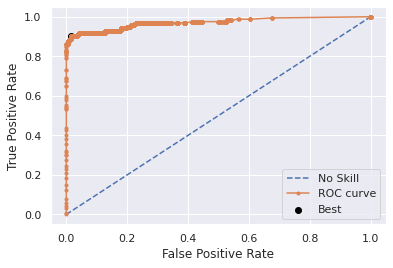

In [0]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [0]:
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in y_pred_probs[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9831998042282444
confusion_matrix 
 [[92262  1563]
 [   16   146]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.09      0.90      0.16       162

    accuracy                           0.98     93987
   macro avg       0.54      0.94      0.57     93987
weighted avg       1.00      0.98      0.99     93987



In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.380550, F-Score=0.868


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.84')

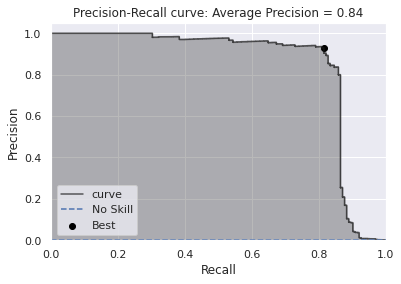

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.999574409226808
confusion_matrix 
 [[93815    10]
 [   30   132]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.93      0.81      0.87       162

    accuracy                           1.00     93987
   macro avg       0.96      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987



### Spot check different model

In [0]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    #'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    #'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning
    #Ensemble:
    #'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    
}


In [0]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


KNN
time : 54.455 

KNN: train_acc: 0.55 train_rec_macro: 0.55 train_prec_macro: 1.00   test_acc: 0.53 test_rec_macro: 0.53 test_prec_macro: 1.00   fit_time: 1.81
LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

time : 21.153 

LR: train_acc: 0.82 train_rec_macro: 0.82 train_prec_macro: 0.92   test_acc: 0.81 test_rec_macro: 0.81 test_prec_macro: 0.91   fit_time: 3.75
LDA
time : 6.656 

LDA: train_acc: 0.88 train_rec_macro: 0.88 train_prec_macro: 0.94   test_acc: 0.88 test_rec_macro: 0.88 test_prec_macro: 0.93   fit_time: 0.87
NB
time : 2.592 

NB: train_acc: 0.81 train_rec_macro: 0.81 train_prec_macro: 0.58   test_acc: 0.81 test_rec_macro: 0.81 test_prec_macro: 0.58   fit_time: 0.09
XGB
time : 198.668 

XGB: train_acc: 0.91 train_rec_macro: 0.91 train_prec_macro: 0.98   test_acc: 0.88 test_rec_macro: 0.88 test_prec_macro: 0.95   fit_time: 38.80
LGBM
time : 30.403 

LGBM: train_acc: 0.81 train_rec_macro: 0.81 train_prec_macro: 0.68   test_acc: 0.81 test_rec_macro: 0.81 test_prec_macro: 0.64   fit_time: 4.50


In [0]:
sorted(cv_results.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_accuracy',
 'test_f1',
 'test_precision',
 'test_recall',
 'train_accuracy',
 'train_f1',
 'train_precision',
 'train_recall']

In [0]:
cv_results['estimator']

(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None))

In [0]:
cv_results['estimator'][1].predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
4,XGB,0.883262,0.883262,0.951439,0.914438,0.913611,0.913611,0.983019,0.945606,38.797042,198.667768
2,LDA,0.883231,0.883231,0.933817,0.906620,0.881722,0.881722,0.936180,0.907125,0.865201,6.655925
1,LR,0.808975,0.808975,0.911216,0.852275,0.815423,0.815423,0.917766,0.859313,3.747354,21.153410
5,LGBM,0.808884,0.808884,0.642290,0.689712,0.814532,0.814532,0.682164,0.721664,4.498426,30.403332
3,NB,0.810618,0.810618,0.576039,0.621060,0.808726,0.808726,0.575633,0.620471,0.091166,2.591580
0,KNN,0.533333,0.533333,0.999193,0.561756,0.549621,0.549621,0.999221,0.589818,1.808641,54.454711


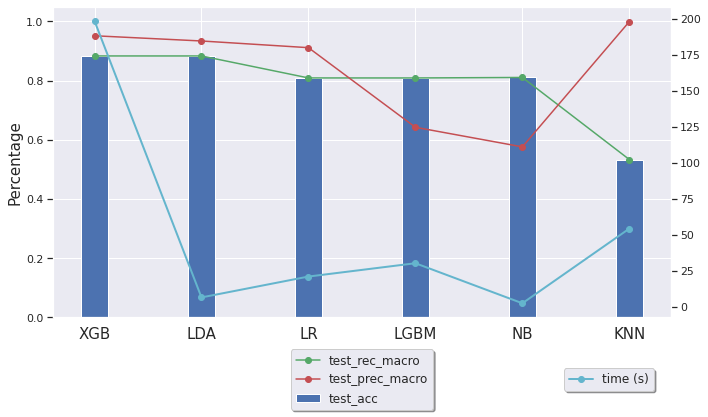

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

## Undersampling Method

In [0]:
# let us first join the train_x and train_y for ease of operation
trainData = pd.concat([X_train,y_train],axis=1)
print(X_train.shape)
print(trainData.shape)
trainData.head()

(190820, 30)
(190820, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,0.378852,0.891074,0.647913,-0.481924,0.886427,0.511591,0.459248,-0.176015,-0.127882,-0.030033,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296,0
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,-0.790319,-0.489896,0.363837,0.879481,-1.240116,-0.370056,0.316326,0.391812,-0.403472,-0.309831,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757,0
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,0.977409,-0.732842,-0.937703,0.749455,0.176803,-1.085530,-2.044358,1.112251,-0.420870,0.040079,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962,0
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,-0.391007,-0.836480,0.227011,0.138962,0.096076,-0.404399,-0.179650,-0.423797,-1.016950,-0.193345,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281,0
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,-0.833822,0.231309,0.688669,1.262601,-1.535982,-0.324980,1.231887,-0.313090,1.377342,0.855879,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279,0


In [0]:
trainData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
# Finding the indexes of the sample data set where the Class  is '1'
ind = trainData[trainData['Class']==1].index
print(len(ind))
# Seperate the minority classes
minData = trainData.loc[ind]
print(minData.shape)

330
(330, 31)


In [0]:
# Finding indexes of majority class
ind1 = trainData[trainData['Class']==0].index
print(len(ind1))
# Seperating the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

190490
(190490, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,0.378852,0.891074,0.647913,-0.481924,0.886427,0.511591,0.459248,-0.176015,-0.127882,-0.030033,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296,0
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,-0.790319,-0.489896,0.363837,0.879481,-1.240116,-0.370056,0.316326,0.391812,-0.403472,-0.309831,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757,0
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,0.977409,-0.732842,-0.937703,0.749455,0.176803,-1.085530,-2.044358,1.112251,-0.420870,0.040079,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962,0
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,-0.391007,-0.836480,0.227011,0.138962,0.096076,-0.404399,-0.179650,-0.423797,-1.016950,-0.193345,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281,0
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,-0.833822,0.231309,0.688669,1.262601,-1.535982,-0.324980,1.231887,-0.313090,1.377342,0.855879,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279,0


In [0]:
# Take a random sample equal to length of the minority class to make the data set balanced
majSample = majData.sample(n=len(ind),
                           #random_state = 123
                           )
print(majSample.shape)
majSample.head()

(330, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69375,53395.0,0.533955,-0.039920,0.864352,0.820435,-0.545198,0.304951,-0.532463,0.233131,0.332857,-0.040115,1.526198,1.675890,0.855743,-0.205055,0.065731,0.051753,-0.418020,0.096271,-0.721789,-0.099330,0.320640,1.201991,-0.114039,0.440624,0.782456,-0.544928,0.212375,0.086066,-0.279265,0
219807,141889.0,1.023844,-0.054794,-0.711343,0.307443,-0.080885,-0.893964,0.221375,-0.322381,0.387783,0.034874,-0.594906,0.834818,0.807447,0.142041,-0.041170,-0.157990,-0.383840,-1.141534,0.157735,-0.152605,-0.357234,-0.899414,0.490918,0.112224,-0.547645,0.393549,-0.177064,-0.161003,-0.228449,0
62681,50376.0,-0.256726,0.190241,0.651263,-0.695664,-0.509002,-0.355911,0.919196,-0.339400,-1.715482,0.260925,-0.408166,-0.682142,0.902962,-0.205041,0.738481,0.775857,0.518587,-1.918996,2.187582,0.362343,-0.184205,-0.676668,0.135708,0.053776,-0.035395,-0.907161,0.055529,0.179994,0.306335,0
59215,48746.0,0.629731,0.466303,0.081020,1.752750,0.159219,-0.628874,0.462649,-0.242132,-0.978173,0.674268,-0.499883,-0.051148,0.094181,0.514230,0.209431,0.368182,-0.570384,-0.617736,-1.089947,-0.209357,-0.020207,-0.071007,-0.166190,0.661255,1.410616,0.140888,-0.095449,0.030545,-0.349231,0
164554,116805.0,0.930710,-0.308607,0.009433,0.868212,-0.545439,0.197939,-0.719071,0.255463,1.019491,0.299674,0.251603,0.331954,-1.087323,0.217572,0.160126,0.980652,-1.193466,1.106615,-0.407647,-0.299430,0.133261,0.386423,0.339980,-0.777873,-0.759290,-1.553050,0.154129,-0.090340,-0.173316,0


In [0]:
# Concatenating both new data sets
balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

balanced data set shape (660, 31)


In [0]:
# Shuffling the data set
balData = shuffle(balData)
balData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18809,29785.0,0.471623,0.208349,-1.899422,1.215991,-2.187703,-0.480185,-3.072792,1.087700,0.786493,-2.659005,2.966718,-2.551219,-1.567844,-3.099662,1.178716,-5.366054,-5.778751,-1.800189,3.687397,0.221646,1.225192,2.041161,1.161430,0.292183,-3.483057,-1.112584,1.211587,-0.150655,-0.232087,1
265636,161972.0,-1.917741,2.154258,-2.221003,-1.026190,-0.459479,-0.810316,-0.931365,2.171339,-0.665228,-1.874234,-2.121749,1.154025,1.467674,0.765012,-0.516239,1.788559,0.741436,1.034108,-1.866005,-0.958374,0.782335,0.875855,-0.114804,-0.051156,0.881902,-0.818927,-3.024295,-0.424641,-0.345193,0
226704,144762.0,0.913186,-1.357577,-0.625042,-1.013222,-1.193158,-0.247728,-0.837171,-0.093117,-1.165961,1.483107,0.366618,-0.231684,0.356977,-0.301885,-0.772330,-0.132519,0.107180,0.799184,0.138276,0.089436,0.044278,0.053640,-0.006496,-0.572194,-0.698500,-0.417518,-0.059641,-0.047946,0.678277,0
70313,53813.0,-0.765291,-0.575994,0.864494,-1.410148,-1.519577,0.421128,-0.248629,0.501708,-1.683711,0.516049,0.600855,0.237025,0.221352,-0.732113,-2.670458,-1.073183,1.314072,-0.245164,-0.578354,-0.373110,-0.115431,0.393437,0.054778,0.394721,0.005734,-0.541274,0.574580,0.116950,0.559174,0
234633,148053.0,0.643962,1.651300,-3.584508,3.773492,1.048396,-1.082803,-0.726464,0.103037,-2.501748,-2.941124,1.950954,-3.989609,0.579949,-8.852335,-0.868316,-0.760209,-1.616121,-0.124453,-1.802015,0.406437,0.284656,-0.586933,-0.247317,-0.031073,1.212856,0.400065,1.159921,0.849746,-0.346872,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83297,59777.0,-4.215624,-2.915548,-3.538532,0.850525,-2.425237,-0.999499,-1.590742,1.084638,-1.524094,-3.146493,0.141629,-4.286960,-0.242039,-3.815474,1.008511,0.963446,-4.648707,-2.156491,0.130066,-1.600661,0.594114,-0.106866,-4.950883,-0.644272,-0.553811,-0.705072,0.098652,-3.053478,0.922960,1
241254,150949.0,-1.237323,1.004716,-2.025666,1.827880,0.822891,-1.420425,-2.092342,-1.864270,-1.520232,-3.222603,1.410117,-1.961497,0.771130,-5.193146,1.156505,-1.138346,-0.962236,0.367224,0.034992,0.459057,-1.271747,1.270549,-0.288658,-0.465155,0.574138,-0.547049,0.372012,0.884967,-0.316087,1
149869,92092.0,-0.565928,2.088622,-4.100222,2.133713,-0.383918,-1.915060,-1.618104,0.914666,-0.761037,-3.761452,2.376726,-6.072122,1.841137,-3.652957,-1.096900,-3.995750,-3.463739,-1.343086,0.459087,-0.088982,1.124474,1.576642,0.333984,-0.487905,-1.324117,-0.756386,0.568159,0.632659,-0.281264,1
254695,156866.0,-0.578582,0.706211,0.317762,-0.755225,0.138391,-0.304052,0.270012,0.196582,0.836876,-0.202838,0.822358,0.447556,-0.189411,-1.549509,-0.190674,1.023592,-0.073297,1.156375,0.005291,0.453604,-0.515818,-0.882335,0.017216,-0.918244,0.063968,-0.472293,1.577455,0.837554,-0.290539,0


In [0]:
# Making the new X_train and y_train
X_trainNew = balData.drop('Class',axis=1)
print(X_trainNew.shape)
# Making the new y_train
y_trainNew = balData['Class']
print(y_trainNew.shape)

(660, 30)
(660,)


Note: not sampling X_test and y_test. We will use model train from all sampling technique apply to train set to evaluate X test, y test

Benchmark model: XGBClassifier

In [0]:
churnModel1 =   XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                scale_pos_weight=1,
                seed=2018,
                verbosity=1)
churnModel1.fit(X_trainNew, y_trainNew)
y_pred_1=churnModel1.predict(X_test)
y_pred_probs_1=churnModel1.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_1[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_1[:,1])
areaUnderROC = auc(fpr, tpr)

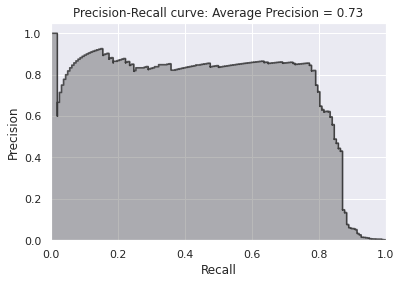

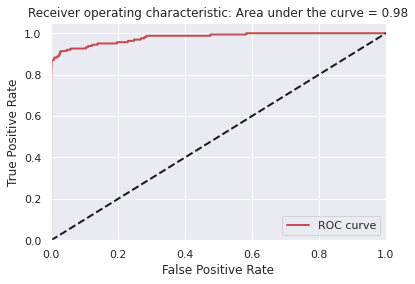

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_1)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_1))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_1))

accuracy_score: 
 0.9667932799216913
confusion_matrix 
 [[90718  3107]
 [   14   148]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     93825
           1       0.05      0.91      0.09       162

    accuracy                           0.97     93987
   macro avg       0.52      0.94      0.53     93987
weighted avg       1.00      0.97      0.98     93987



Adjust threshold for best F1

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.996258, F-Score=0.812


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.73')

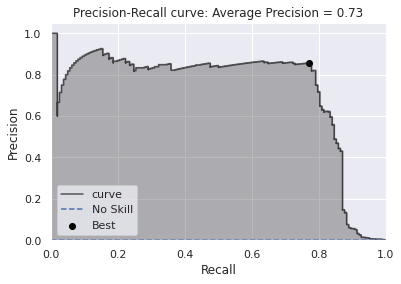

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs_1[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9993828933788715
confusion_matrix 
 [[93804    21]
 [   37   125]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.86      0.77      0.81       162

    accuracy                           1.00     93987
   macro avg       0.93      0.89      0.91     93987
weighted avg       1.00      1.00      1.00     93987



## SMOTE

In [0]:
!pip install smote_variants

In [0]:
import smote_variants as sv
# Instantiating the SMOTE class
oversampler= sv.distance_SMOTE()

Luu y: du lieu phai duoc label encoder or get dummies truoc khi thuc hien oversampler

In [0]:
# Creating new training set
X_train_smote, y_train_smote = oversampler.sample(np.array(X_train), np.array(y_train))

2020-06-09 12:43:04,338:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
print(y_train[y_train==0].shape)
print(X_train.shape)
print(X_train_smote.shape)
# oversampler: class 1 is the same as class 0 (227451 * 2 = 454902)

(190490,)
(190820, 30)
(380980, 30)


In [0]:
X_train_smote_df=pd.DataFrame(X_train_smote,columns=X_train.columns)
X_train_smote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,0.378852,0.891074,0.647913,-0.481924,0.886427,0.511591,0.459248,-0.176015,-0.127882,-0.030033,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296
1,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,-0.790319,-0.489896,0.363837,0.879481,-1.240116,-0.370056,0.316326,0.391812,-0.403472,-0.309831,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757
2,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,0.977409,-0.732842,-0.937703,0.749455,0.176803,-1.085530,-2.044358,1.112251,-0.420870,0.040079,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962
3,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,-0.391007,-0.836480,0.227011,0.138962,0.096076,-0.404399,-0.179650,-0.423797,-1.016950,-0.193345,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281
4,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,-0.833822,0.231309,0.688669,1.262601,-1.535982,-0.324980,1.231887,-0.313090,1.377342,0.855879,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279


In [0]:
churnModel2 = XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                scale_pos_weight=1,
                seed=2018,
                verbosity=1)
churnModel2.fit(X_train_smote_df, y_train_smote)

y_pred_2=churnModel2.predict(X_test)
y_pred_probs_2=churnModel2.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_2[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_2[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_2[:,1])
areaUnderROC = auc(fpr, tpr)

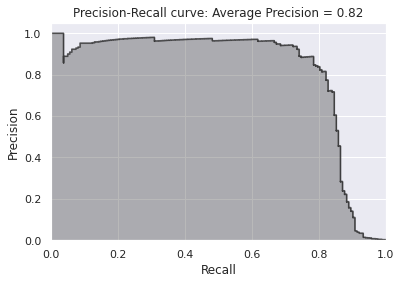

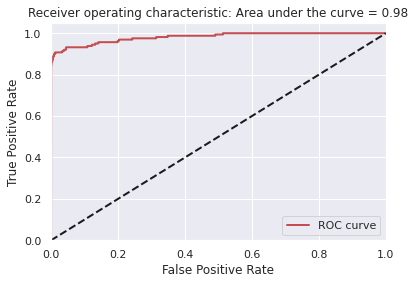

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_2)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_2))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_2))

accuracy_score: 
 0.9978507665953802
confusion_matrix 
 [[93645   180]
 [   22   140]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.44      0.86      0.58       162

    accuracy                           1.00     93987
   macro avg       0.72      0.93      0.79     93987
weighted avg       1.00      1.00      1.00     93987



Adjust threshold by best F1

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_2[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.995074, F-Score=0.833


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.82')

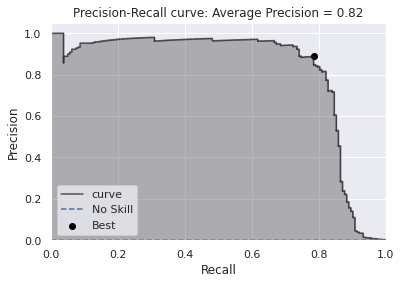

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs_2[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9994573717641801
confusion_matrix 
 [[93809    16]
 [   35   127]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.89      0.78      0.83       162

    accuracy                           1.00     93987
   macro avg       0.94      0.89      0.92     93987
weighted avg       1.00      1.00      1.00     93987



## MSMOTE

In [0]:
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train), np.array(y_train))

2020-06-09 12:44:39,575:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
print(y_train_msmote.shape)
print(X_train_msmote.shape)

(380980,)
(380980, 30)


In [0]:
X_train_msmote_df=pd.DataFrame(X_train_msmote,columns=X_train.columns)
X_train_msmote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,0.378852,0.891074,0.647913,-0.481924,0.886427,0.511591,0.459248,-0.176015,-0.127882,-0.030033,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296
1,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,-0.790319,-0.489896,0.363837,0.879481,-1.240116,-0.370056,0.316326,0.391812,-0.403472,-0.309831,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757
2,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,0.977409,-0.732842,-0.937703,0.749455,0.176803,-1.085530,-2.044358,1.112251,-0.420870,0.040079,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962
3,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,-0.391007,-0.836480,0.227011,0.138962,0.096076,-0.404399,-0.179650,-0.423797,-1.016950,-0.193345,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281
4,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,-0.833822,0.231309,0.688669,1.262601,-1.535982,-0.324980,1.231887,-0.313090,1.377342,0.855879,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279


In [0]:
churnModel3 = XGBClassifier(
                nthread=16,
                objective='binary:logistic',
                eval_metric = 'logloss',
                scale_pos_weight=1,
                seed=2018,
                verbosity=1)
churnModel3.fit(X_train_msmote_df, y_train_msmote)
y_pred_3=churnModel3.predict(X_test)
y_pred_probs_3=churnModel3.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_3[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_3[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_3[:,1])
areaUnderROC = auc(fpr, tpr)

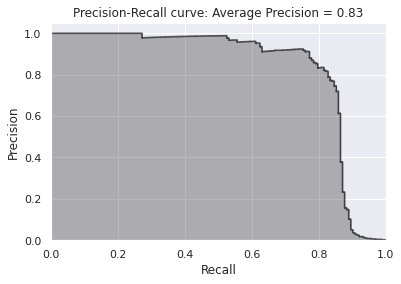

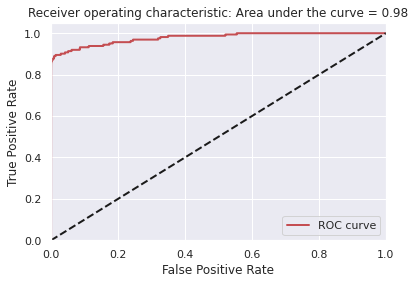

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_3)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_3))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_3))

accuracy_score: 
 0.9994148126868609
confusion_matrix 
 [[93804    21]
 [   34   128]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.86      0.79      0.82       162

    accuracy                           1.00     93987
   macro avg       0.93      0.89      0.91     93987
weighted avg       1.00      1.00      1.00     93987



Adjust best threshold

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_3[:,1])
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))

Best Threshold=0.907983, F-Score=0.836


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.83')

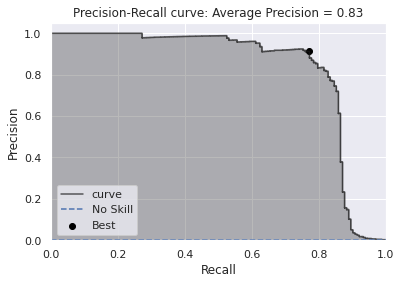

In [0]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [0]:
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in y_pred_probs_3[:, 1]]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9994786513028397
confusion_matrix 
 [[93813    12]
 [   37   125]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.91      0.77      0.84       162

    accuracy                           1.00     93987
   macro avg       0.96      0.89      0.92     93987
weighted avg       1.00      1.00      1.00     93987



# Deep learning

In [14]:
import tensorflow as tf
from tensorflow import keras

X_train_a, X_test, y_train_a, y_test = train_test_split(dataX,dataY, test_size=0.2, 
                                    random_state=2018, stratify=dataY)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
print(dataX.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.fit_transform(X_test)
X_train_a=scaler.fit_transform(X_train_a)

(284807, 30)
(182276, 30)
(45569, 30)
(56962, 30)


In [0]:
def plot_loss(history, label):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               #color=colors[n], 
               label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          #color=colors[n], 
          label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

In [0]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Base model

In [0]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [21]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model =Sequential()
model.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(DROPOUT))
#----hiden layer-------#
#model.add(Dense(40,activation='relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(20,activation='relu'))
#model.add(Dropout(DROPOUT))
#----output-------#
model.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
model.summary()
# compiling the model
model.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [22]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            #ModelCheckpoint(filepath="best_model.h5",
            #                monitor="val_auc",
            #                save_best_only=True)
            ]
#training the moodel
result=model.fit(X_train, y_train,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)

Train on 182276 samples, validate on 45569 samples
Epoch 1/200
 - 2s - loss: 0.3877 - tp: 91.8251 - fp: 22210.2793 - tn: 69626.6094 - fn: 67.3279 - accuracy: 0.6975 - precision: 0.0039 - recall: 0.6351 - auc: 0.7084 - val_loss: 0.1254 - val_tp: 181.3478 - val_fp: 29722.3691 - val_tn: 175687.0625 - val_fn: 175.8478 - val_accuracy: 0.8541 - val_precision: 0.0061 - val_recall: 0.5077 - val_auc: 0.6770
Epoch 2/200
 - 1s - loss: 0.1085 - tp: 257.8689 - fp: 30652.3555 - tn: 288641.7500 - fn: 289.0710 - accuracy: 0.9007 - precision: 0.0083 - recall: 0.4725 - auc: 0.6844 - val_loss: 0.0377 - val_tp: 367.0435 - val_fp: 31130.3047 - val_tn: 401730.0938 - val_fn: 384.1522 - val_accuracy: 0.9273 - val_precision: 0.0117 - val_recall: 0.4885 - val_auc: 0.7180
Epoch 3/200
 - 1s - loss: 0.0544 - tp: 473.5738 - fp: 31292.6445 - tn: 515447.3438 - fn: 472.5355 - accuracy: 0.9415 - precision: 0.0149 - recall: 0.5000 - auc: 0.7421 - val_loss: 0.0171 - val_tp: 588.2174 - val_fp: 31411.6953 - val_tn: 628899.

In [23]:
predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.71      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



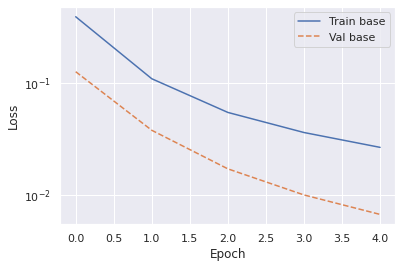

In [24]:
plot_loss(result,'base')

56962/56962 [==============================] - 0s 5us/step
loss :  0.007762441133502747
tp :  1141.5438232421875
fp :  31655.2109375
tn :  1134550.0
fn :  877.8947143554688
accuracy :  0.9721462726593018
precision :  0.03480624780058861
recall :  0.565253496170044
auc :  0.8246959447860718

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  70
Total Fraudulent Transactions:  98


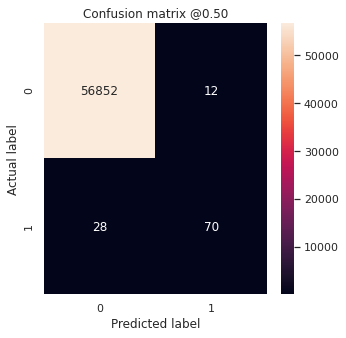

In [25]:
prediction_proba=model.predict(X_test)
baseline_results = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, prediction_proba)

Normalized confusion matrix


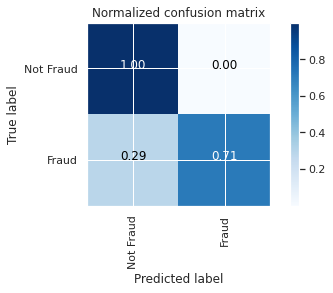

In [26]:
classes=['Not Fraud','Fraud']
cnf_matrix=confusion_matrix(y_test,predictions)
# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

## Tunning threshold by validation

areaUnderROC 0.9874149555751577
(651,)
Best Threshold=0.006191, G-Mean=0.967


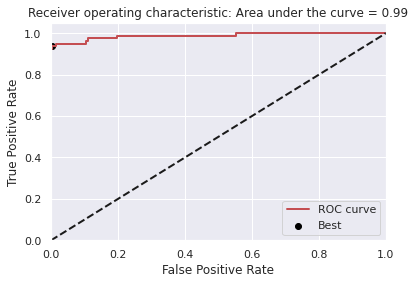

In [42]:
prediction_proba_val=model.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val,prediction_proba_val)
areaUnderROC = auc(fpr, tpr)
print('areaUnderROC',areaUnderROC)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [44]:
# Base on threshold from X val
prediction_proba_test=model.predict(X_test)
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in prediction_proba_test]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9979635546504687
confusion_matrix 
 [[56762   102]
 [   14    84]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.86      0.59        98

    accuracy                           1.00     56962
   macro avg       0.73      0.93      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
#No threshold tunning
predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



average_precision 0.8370317132014771
Best Threshold=0.453480, F-Score=0.863


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.84')

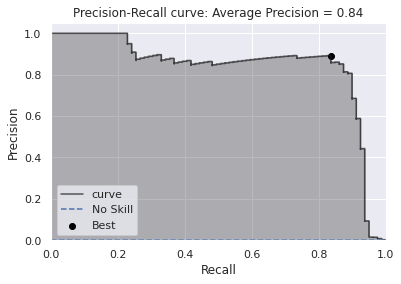

In [47]:
prediction_proba_val=model.predict(X_val)
precision, recall, thresholds = precision_recall_curve(y_val,prediction_proba_val)
average_precision = average_precision_score(y_val,prediction_proba_val)
print("average_precision",average_precision)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [48]:
# Base on threshold from X val
prediction_proba_test=model.predict(X_test)
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in prediction_proba_test]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.9993679997191109
confusion_matrix 
 [[56850    14]
 [   22    76]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.78      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
# Normal threshold 0.5
prediction_proba_test=model.predict(X_test)
y_pred_new = [1 if x >= 0.5 else 0 for x in prediction_proba_test]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.999385555282469
confusion_matrix 
 [[56852    12]
 [   23    75]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Class Weight model

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#build the model
#----input-------#
model2 =Sequential()
model2.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))
model2.add(Dropout(DROPOUT))
#----hiden layer-------#
#model.add(Dense(40,activation='relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(20,activation='relu'))
#model.add(Dropout(DROPOUT))
#----output-------#
model2.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
model2.summary()
# compiling the model
model2.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [17]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights

array([  0.50086557, 289.32698413])

In [0]:
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           )]
#training the moodel
result=model2.fit(X_train, y_train,class_weight=class_weights,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)

Train on 182276 samples, validate on 45569 samples
Epoch 1/200
 - 4s - loss: 0.0793 - tp: 44891.8047 - fp: 180542.7500 - tn: 38752940.0000 - fn: 22449.8301 - accuracy: 0.9951 - precision: 0.1991 - recall: 0.6666 - auc: 0.9334 - val_loss: 0.0039 - val_tp: 45005.2031 - val_fp: 180722.6875 - val_tn: 38866692.0000 - val_fn: 22535.0078 - val_accuracy: 0.9952 - val_precision: 0.1994 - val_recall: 0.6663 - val_auc: 0.9332
Epoch 2/200
 - 4s - loss: 0.0096 - tp: 45123.7227 - fp: 180749.4688 - tn: 38980536.0000 - fn: 22605.8672 - accuracy: 0.9952 - precision: 0.1998 - recall: 0.6662 - auc: 0.9332 - val_loss: 0.0026 - val_tp: 45270.9844 - val_fp: 180774.3281 - val_tn: 39094468.0000 - val_fn: 22663.2520 - val_accuracy: 0.9952 - val_precision: 0.2003 - val_recall: 0.6664 - val_auc: 0.9331
Epoch 3/200
 - 4s - loss: 0.0064 - tp: 45409.0234 - fp: 180789.4375 - tn: 39208396.0000 - fn: 22719.6094 - accuracy: 0.9952 - precision: 0.2007 - recall: 0.6665 - auc: 0.9331 - val_loss: 0.0024 - val_tp: 45545.921

In [0]:
predictions=model2.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.76      0.81        98

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



56962/56962 [==============================] - 1s 11us/step
loss :  0.0035676355377370133
tp :  45897.5
fp :  180867.4375
tn :  39601300.0
fn :  22911.15625
accuracy :  0.9952599406242371
precision :  0.2024010568857193
recall :  0.6670314073562622
auc :  0.9331230521202087

Legitimate Transactions Detected (True Negatives):  56853
Legitimate Transactions Incorrectly Detected (False Positives):  11
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  74
Total Fraudulent Transactions:  98


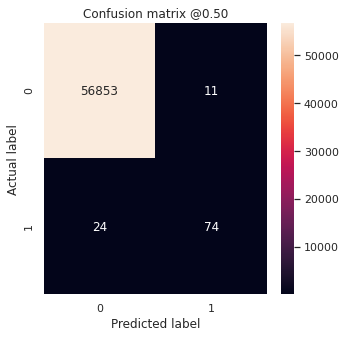

In [0]:
prediction_proba=model2.predict(X_test)
baseline_results = model2.evaluate(X_test, y_test,batch_size=BATCH_SIZE)
for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, prediction_proba)

Normalized confusion matrix


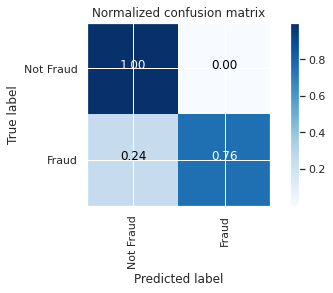

In [0]:
classes=['Not Fraud','Fraud']
cnf_matrix=confusion_matrix(y_test,predictions)
# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

In [0]:
# For each class
precision = dict()
recall = dict()
threshold=dict()
fpr = dict()
tpr = dict()
thresholds_roc=dict()

average_precision = dict()
f1_score_dict = dict()
recall_score_dict = dict()
precision_score_dict = dict()
roc_auc_score_dict = dict()
accuracy_score_ = dict()

i=0
for name in y_test.columns:
  # y test and y_predict_prob
  precision[name], recall[name], threshold[name] = precision_recall_curve(y_test[name],
                                                      predictions_prob[:,i])
  fpr[name], tpr[name], thresholds_roc[name] = roc_curve(y_test[name],
                                                      predictions_prob[:,i])
  average_precision[name] = average_precision_score(y_test[name], predictions_prob[:,i])
  roc_auc_score_dict[name] = roc_auc_score(y_test[name], predictions_prob[:,i])

  # y test and y_predict
  f1_score_dict[name] = f1_score(y_test[name], predictions_df[i],average='macro')
  recall_score_dict[name] = recall_score(y_test[name], predictions_df[i],average='macro')
  precision_score_dict[name] = precision_score(y_test[name], predictions_df[i],average='macro')
  accuracy_score_[name] = accuracy_score(y_test[name], predictions_df[i])

  i+=1

## Tunning Different DL model

In [0]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [0]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model3 =Sequential()
model3.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
model3.add(Dropout(DROPOUT))
#----hiden layer-------#
model3.add(Dense(20,activation='relu'))
model3.add(Dropout(DROPOUT))
model3.add(Dense(10,activation='relu'))
model3.add(Dropout(DROPOUT))
#----output-------#
model3.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
model3.summary()
# compiling the model
model3.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_35 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_36 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_37 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)               

In [0]:
# network and training
EPOCHS = 200
BATCH_SIZE = 100 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            #ModelCheckpoint(filepath="best_model.h5",
            #                monitor="val_auc",
            #                save_best_only=True)
            ]
#training the moodel
result=model3.fit(X_train, y_train,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)

Train on 182276 samples, validate on 45569 samples
Epoch 1/200
 - 4s - loss: 0.0483 - tp: 45959.6953 - fp: 182403.8750 - tn: 39719364.0000 - fn: 23060.1074 - accuracy: 0.9952 - precision: 0.2013 - recall: 0.6659 - auc: 0.9327 - val_loss: 0.0032 - val_tp: 46043.4023 - val_fp: 182452.3125 - val_tn: 39833228.0000 - val_fn: 23170.8574 - val_accuracy: 0.9952 - val_precision: 0.2015 - val_recall: 0.6652 - val_auc: 0.9325
Epoch 2/200
 - 4s - loss: 0.0110 - tp: 46150.1016 - fp: 182476.3125 - tn: 39947076.0000 - fn: 23260.6816 - accuracy: 0.9952 - precision: 0.2019 - recall: 0.6649 - auc: 0.9325 - val_loss: 0.0029 - val_tp: 46262.0664 - val_fp: 182493.2812 - val_tn: 40061008.0000 - val_fn: 23346.1055 - val_accuracy: 0.9953 - val_precision: 0.2022 - val_recall: 0.6646 - val_auc: 0.9325
Epoch 3/200
 - 4s - loss: 0.0087 - tp: 46379.0234 - fp: 182512.4062 - tn: 40174888.0000 - fn: 23425.4922 - accuracy: 0.9953 - precision: 0.2026 - recall: 0.6644 - auc: 0.9325 - val_loss: 0.0028 - val_tp: 46498.640

In [0]:
predictions=model3.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.73      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [1]:
plot_loss(result,'base')

NameError: ignored

56962/56962 [==============================] - 1s 12us/step
loss :  0.0031674883875676546
tp :  48702.0625
fp :  182901.21875
tn :  42389968.0
fn :  24932.578125
accuracy :  0.9955223798751831
precision :  0.21028229594230652
recall :  0.6614015698432922
auc :  0.933430016040802

Legitimate Transactions Detected (True Negatives):  56850
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  72
Total Fraudulent Transactions:  98


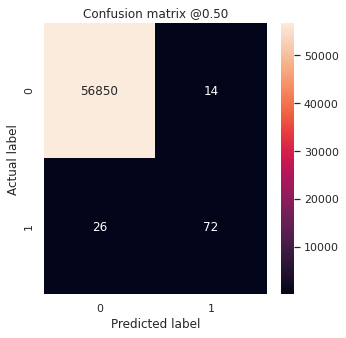

In [0]:
prediction_proba=model3.predict(X_test)
baseline_results = model3.evaluate(X_test, y_test,batch_size=BATCH_SIZE)
for name, value in zip(model3.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, prediction_proba)

Normalized confusion matrix


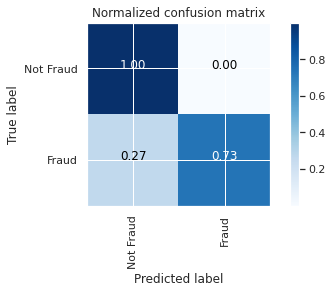

In [0]:
classes=['Not Fraud','Fraud']
cnf_matrix=confusion_matrix(y_test,predictions)
# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

## Undersampling

In [50]:
#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now pa

In [53]:
nr = NearMiss()
X_train_under, y_train_under = nr.fit_sample(X_train, y_train)
print(X_train_under.shape)
Counter(y_train_under)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [56]:
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model =Sequential()
model.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(DROPOUT))
#----hiden layer-------#
#model.add(Dense(40,activation='relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(20,activation='relu'))
#model.add(Dropout(DROPOUT))
#----output-------#
model.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
model.summary()
# compiling the model
model.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [57]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           )]
#training the moodel
result=model.fit(X_train_under, y_train_under,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=2)

Train on 630 samples, validate on 45569 samples
Epoch 1/200
 - 1s - loss: 1.0079 - tp: 2518.0000 - fp: 4341.0000 - tn: 1872446.0000 - fn: 1047.0000 - accuracy: 0.9971 - precision: 0.3671 - recall: 0.7063 - auc: 0.9294 - val_loss: 0.7947 - val_tp: 2557.1304 - val_fp: 17103.1738 - val_tn: 1883132.3750 - val_fn: 1050.0652 - val_accuracy: 0.9905 - val_precision: 0.1532 - val_recall: 0.7089 - val_auc: 0.9270
Epoch 2/200
 - 0s - loss: 0.8928 - tp: 2840.0000 - fp: 29431.0000 - tn: 1893161.0000 - fn: 1119.0000 - accuracy: 0.9841 - precision: 0.0880 - recall: 0.7174 - auc: 0.9291 - val_loss: 0.7924 - val_tp: 2879.1304 - val_fp: 42140.8047 - val_tn: 1903899.8750 - val_fn: 1122.0652 - val_accuracy: 0.9778 - val_precision: 0.0656 - val_recall: 0.7196 - val_auc: 0.9269
Epoch 3/200
 - 0s - loss: 0.8652 - tp: 3166.0000 - fp: 54407.0000 - tn: 1913990.0000 - fn: 1187.0000 - accuracy: 0.9718 - precision: 0.0550 - recall: 0.7273 - auc: 0.9285 - val_loss: 0.7898 - val_tp: 3205.1304 - val_fp: 67052.6719 - 

In [58]:
predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63     56864
           1       0.00      0.91      0.01        98

    accuracy                           0.46     56962
   macro avg       0.50      0.68      0.32     56962
weighted avg       1.00      0.46      0.63     56962



## SMOTE

In [60]:
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_sample(X_train, y_train)
print(X_train_smote.shape)
Counter(y_train_smote)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [61]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           )]
#training the moodel
result=model.fit(X_train_smote, y_train_smote,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=0)
predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.92      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



## MSMOTE

In [0]:
!pip install smote_variants

In [69]:
import smote_variants as sv
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train), np.array(y_train))
print(X_train_msmote.shape)
Counter(y_train_msmote)

2020-06-14 06:21:20,605:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


(363922, 30)


Counter({0: 181961, 1: 181961})

In [70]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000 #10 as normal

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           )]
#training the moodel
result=model.fit(X_train_msmote, y_train_msmote,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=0)

predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.85      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962



## Try all method imbalanced

In [12]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss,RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN,CondensedNearestNeighbour,OneSidedSelection,NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN,SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [13]:
import tensorflow as tf
from tensorflow import keras

X_train_a, X_test, y_train_a, y_test = train_test_split(dataX,dataY, test_size=0.2, 
                                    random_state=2018, stratify=dataY)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
print(dataX.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.fit_transform(X_test)
X_train_a=scaler.fit_transform(X_train_a)

(284807, 30)
(182276, 30)
(45569, 30)
(56962, 30)


In [0]:
list_method={
# Under sampling
'NearMiss':NearMiss(),
#'RandomUnderSampler':RandomUnderSampler(random_state=0),
#'RepeatedEditedNearestNeighbours':RepeatedEditedNearestNeighbours(random_state=0), # Very long
#'AllKNN':AllKNN(random_state=0),
#'CondensedNearestNeighbour':CondensedNearestNeighbour(random_state=0),
#'OneSidedSelection':OneSidedSelection(random_state=0),
#'NeighbourhoodCleaningRule':NeighbourhoodCleaningRule(random_state=0),
# Over sampling
'RandomOverSampler':RandomOverSampler(random_state=0),
'SMOTE':SMOTE(random_state=0),
'ADASYN':ADASYN(random_state=0),
'BorderlineSMOTE-1':BorderlineSMOTE(random_state=0, kind='borderline-1'),
'BorderlineSMOTE-2':BorderlineSMOTE(random_state=0, kind='borderline-2'),
'SVMSMOTE':SVMSMOTE(random_state=0),
}

In [0]:
def make_model():
  METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]
  tf.random.set_seed(42)
  np.random.seed(42)

  DROPOUT = 0.3
  numlabel=1
  #output_bias=0.5
  #build the model
  #----input-------#
  model =Sequential()
  model.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))
  model.add(Dropout(DROPOUT))
  #----hiden layer-------#
  #model.add(Dense(40,activation='relu'))
  #model.add(Dropout(DROPOUT))
  #model.add(Dense(20,activation='relu'))
  #model.add(Dropout(DROPOUT))
  #----output-------#
  model.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                  #bias_initializer=output_bias
                  )) 
  #model.summary()
  # compiling the model
  model.compile(optimizer='Adam', 
                #optimizer=keras.optimizers.SGD(lr=1e-3),
                loss='binary_crossentropy',
                metrics=METRICS)
  return model

In [16]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000 #10 as normal
callbacks = [EarlyStopping(monitor="val_recall", patience=3)]
#training the moodel
for name,method in list_method.items():
  
  t0=time.time()
  print(name)
  X_train_transform, y_train_transform= method.fit_sample(X_train, y_train)
  model=make_model()
  result=model.fit(X_train_transform, y_train_transform,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=0)
  predictions=model.predict_classes(X_test)
  #y_test_labels = np.argmax(y_test.values, axis =1)
  t1=time.time()
  print('time',t1-t0)
  print(classification_report(y_test,predictions))
  

NearMiss


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 6.289361238479614
              precision    recall  f1-score   support

           0       1.00      0.46      0.63     56864
           1       0.00      0.92      0.01        98

    accuracy                           0.46     56962
   macro avg       0.50      0.69      0.32     56962
weighted avg       1.00      0.46      0.63     56962

RandomOverSampler


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 11.251741409301758
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 11.924681901931763
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

ADASYN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 14.08621621131897
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962

BorderlineSMOTE-1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 14.122735738754272
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.86      0.53        98

    accuracy                           1.00     56962
   macro avg       0.69      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962

BorderlineSMOTE-2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 14.768766641616821
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.86      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.93      0.72     56962
weighted avg       1.00      1.00      1.00     56962

SVMSMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 173.3428020477295
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.85      0.54        98

    accuracy                           1.00     56962
   macro avg       0.70      0.92      0.77     56962
weighted avg       1.00      1.00      1.00     56962

